In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt

2023-01-15 10:24:45.806872: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)

data_dir = pathlib.Path(data_dir)

In [2]:
data_dir_ = '/Users/fesusaron/.keras/datasets/flower_photos'

In [32]:
image_data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=321,
    validation_split=0.2,
    subset='both',
    interpolation='bilinear',
    follow_links=False
)


Found 3444 files belonging to 5 classes.
Using 2756 files for training.
Using 688 files for validation.


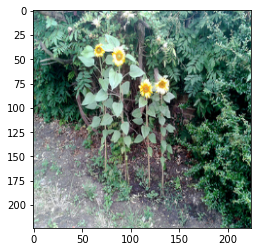

tf.Tensor(
[[[ 82.609695   137.04337    114.67347   ]
  [102.79846    151.69643    134.82654   ]
  [142.45409    192.08673    158.09949   ]
  ...
  [ 89.7473     106.652855   120.97968   ]
  [139.72198    171.79611    165.2578    ]
  [118.813      162.03719    149.9046    ]]

 [[ 91.60969    135.44388    130.47704   ]
  [ 92.466835   139.70409    116.10714   ]
  [ 96.98724    128.19897    114.66837   ]
  ...
  [124.768074   131.16585    133.71413   ]
  [142.39297    169.74516    157.05377   ]
  [149.10432    195.22925    171.49449   ]]

 [[ 92.60459    128.68367    125.29847   ]
  [ 88.70408    112.85458    102.67601   ]
  [ 79.436226    96.37499    103.04846   ]
  ...
  [164.23325    152.96494    146.776     ]
  [128.71927    131.69633    127.02794   ]
  [159.1059     179.00684    171.7645    ]]

 ...

 [[183.0459     187.12245    198.05356   ]
  [172.18369    174.15053    191.59439   ]
  [209.55618    221.15309    231.34442   ]
  ...
  [  5.6785564   25.048664    32.176277  ]
  [  3.

In [ ]:
image, label = next(iter(image_data))

plt.imshow(image[2].numpy()/255)
plt.show()

print(image[2])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [ ]:
model.fit(image_data[0], epochs=10, validation_data=image_data[1])

Epoch 1/10
90/90 [==============================] - 81s 875ms/step - loss: 9.6167 - accuracy: 0.6261 - val_loss: 12.9983 - val_accuracy: 0.4749
Epoch 2/10
90/90 [==============================] - 79s 866ms/step - loss: 3.6138 - accuracy: 0.7683 - val_loss: 13.3712 - val_accuracy: 0.4596
Epoch 3/10
90/90 [==============================] - 79s 864ms/step - loss: 2.3056 - accuracy: 0.8369 - val_loss: 12.1974 - val_accuracy: 0.4903
Epoch 4/10
90/90 [==============================] - 77s 853ms/step - loss: 1.2905 - accuracy: 0.8908 - val_loss: 12.8884 - val_accuracy: 0.4568
Epoch 5/10
90/90 [==============================] - 82s 902ms/step - loss: 0.7669 - accuracy: 0.9231 - val_loss: 11.9695 - val_accuracy: 0.4958
Epoch 6/10
90/90 [==============================] - 77s 847ms/step - loss: 0.8108 - accuracy: 0.9377 - val_loss: 11.5508 - val_accuracy: 0.4889
Epoch 7/10
90/90 [==============================] - 76s 844ms/step - loss: 0.5698 - accuracy: 0.9603 - val_loss: 14.9905 - val_accuracy:

In [84]:
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications import MobileNetV3Large

In [94]:
base_model = MobileNetV3Small(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

In [95]:
modelV3 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5, activation='softmax')
])

modelV3.layers[0].trainable = False

In [96]:
modelV3.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 global_average_pooling2d_8   (None, 576)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_21 (Dense)            (None, 64)                36928     
                                                                 
 batch_normalization_11 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_22 (Dense)            (None, 5)                 325       
                                                     

In [34]:
modelV3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
historyV3 = modelV3.fit(image_data[0], epochs=10, validation_data=image_data[1])

Epoch 1/10
90/90 [==============================] - 135s 1s/step - loss: 0.5456 - accuracy: 0.8042 - val_loss: 0.9888 - val_accuracy: 0.7103
Epoch 2/10
90/90 [==============================] - 111s 1s/step - loss: 0.1862 - accuracy: 0.9360 - val_loss: 1.0355 - val_accuracy: 0.7465
Epoch 3/10
90/90 [==============================] - 112s 1s/step - loss: 0.1094 - accuracy: 0.9614 - val_loss: 0.7419 - val_accuracy: 0.8175
Epoch 4/10
90/90 [==============================] - 115s 1s/step - loss: 0.0666 - accuracy: 0.9746 - val_loss: 0.7983 - val_accuracy: 0.8175
Epoch 5/10
90/90 [==============================] - 116s 1s/step - loss: 0.0798 - accuracy: 0.9729 - val_loss: 0.6635 - val_accuracy: 0.8412
Epoch 6/10
90/90 [==============================] - 113s 1s/step - loss: 0.0684 - accuracy: 0.9774 - val_loss: 1.1039 - val_accuracy: 0.8008
Epoch 7/10
90/90 [==============================] - 113s 1s/step - loss: 0.0546 - accuracy: 0.9819 - val_loss: 1.1870 - val_accuracy: 0.8036
Epoch 8/10
90

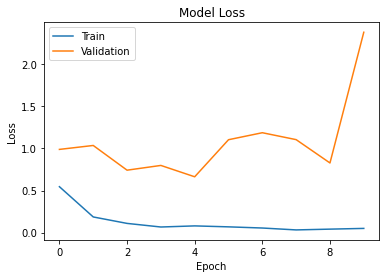

In [ ]:
plt.plot(historyV3.history['loss'])
plt.plot(historyV3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

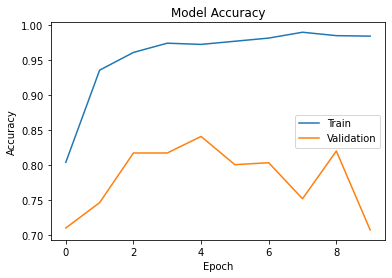

In [ ]:
plt.plot(historyV3.history['accuracy'])
plt.plot(historyV3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

In [53]:
#Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator


data_generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [54]:
train_gen = data_generator.flow_from_directory(
        data_dir_,
        target_size=(224, 224),
        batch_size=32,
        seed=111,
        subset='training')

Found 2758 images belonging to 5 classes.


In [55]:
val_gen = data_generator.flow_from_directory(
        data_dir_,
        target_size=(224, 224),
        batch_size=32,
        seed=111,
        subset='validation')

Found 686 images belonging to 5 classes.


In [97]:
modelV3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [31]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='/Users/fesusaron/Desktop/ML/log', histogram_freq=1)

In [98]:
historyV3_aug = modelV3.fit(train_gen, epochs=10, validation_data=val_gen, callbacks=tb_callback)

Epoch 1/10
87/87 [==============================] - 90s 945ms/step - loss: 1.5659 - accuracy: 0.3756 - val_loss: 1.1169 - val_accuracy: 0.5948
Epoch 2/10
87/87 [==============================] - 101s 1s/step - loss: 0.9390 - accuracy: 0.6613 - val_loss: 0.8384 - val_accuracy: 0.7085
Epoch 3/10
87/87 [==============================] - 85s 976ms/step - loss: 0.7572 - accuracy: 0.7386 - val_loss: 0.6663 - val_accuracy: 0.7828
Epoch 4/10
87/87 [==============================] - 97s 1s/step - loss: 0.6497 - accuracy: 0.7781 - val_loss: 0.6051 - val_accuracy: 0.7843
Epoch 5/10
24/87 [=======>......................] - ETA: 1:06 - loss: 0.5998 - accuracy: 0.7930

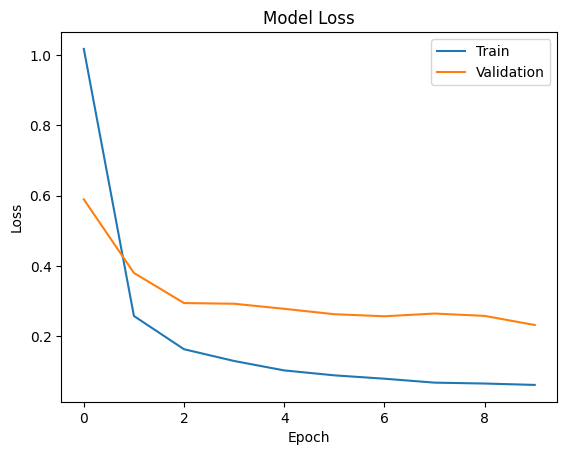

In [82]:
plt.plot(historyV3_aug.history['loss'])
plt.plot(historyV3_aug.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

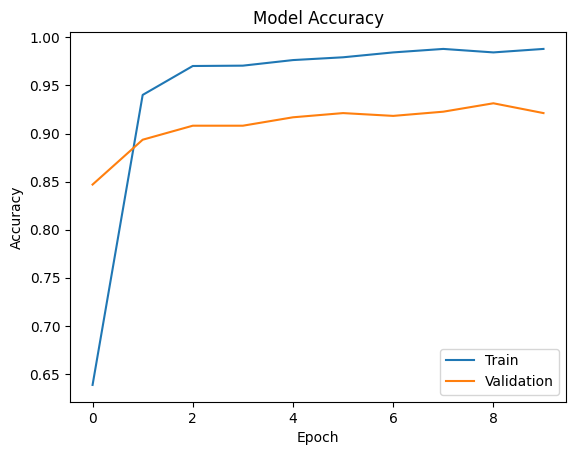

In [83]:
plt.plot(historyV3_aug.history['accuracy'])
plt.plot(historyV3_aug.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()